In [1]:
import os
import pandas as pd
import glob
import virga.justdoit as jdi
import virga.justplotit as jpi
import virga.ior_factory as ior
jpi.output_notebook()

Loading BokehJS ...

## How to see what optical properties are being used

In [2]:
ior_configs = ior.configure_ior_choices()
ior_configs['Na2S']

{'inhouse_file': 'Na2S_LXMIE.dat',
 'reference': '\\\\cite{Khachai2009Na2S,Montaner1979Sulfur}',
 'url': 'https://raw.githubusercontent.com/exoclime/LX-MIE/master/compilation/Na2S.dat',
 'usr_note': 'Data source from LX-MIE, Kitzmann & Heng (2018) \\\\cite{Kitzmann2018optical}. ',
 'pandas_kwargs': {'sep': '\\s+', 'skiprows': 3, 'names': ['um', 'n', 'k']}}

This allows you to read the raw data file (before it was pre-processed into Virga format like this)

In [3]:
na2s = pd.read_csv(ior_configs['Na2S']['url'], **ior_configs['Na2S']['pandas_kwargs'])
na2s.head()

,um,n,k
0,0.041328,0.900372,0.063904
1,0.041709,0.953612,0.081016
2,0.042093,0.916274,0.052723
3,0.042481,0.867385,0.031485
4,0.042873,0.867165,0.040997


You may see a molecule that does not have a URL that is attached to a data file. In those cases it was likely taken from HITRAN 2020. In those cases you can access it by first downloading and untarring HITRAN 2020 Aersol data at the specified URL:

In [4]:
ior_configs['ZnS']['url'] #file to download

'https://hitran.org/data/Aerosols/Aerosols-2020/'

In [5]:
#point to untarred file
hitran_directory = '/Users/nbatalh1/Documents/data/hitran_ri/'
zns = pd.read_csv(os.path.join(hitran_directory,ior_configs['ZnS']['hitran2020'])
                  , **ior_configs['ZnS']['pandas_kwargs'])
zns.head()

,cm-1,um,n,k,nerr,kerr
0,60.0,166.67,3.008,0.036,0.010,0.036
1,80.0,125.00,3.029,0.049,0.010,0.049
2,100.0,100.00,3.058,0.063,0.011,0.059
3,120.0,83.33,3.097,0.079,0.012,0.061
4,140.0,71.43,3.150,0.098,0.013,0.063


## Creating aggregated Index of Refraction (IOR) Files

Thought you can download the optical properties from zenodo, sometimes users may wish to create their own on specified grids. Before you do so you will need to download HITRAN 2020, which is quite small (177 Mb untarred). 

Required DOWNLOAD: https://hitran.org/data/Aerosols/Aerosols-2020/

Optional Download: https://github.com/exoclime/LX-MIE 

Saving /Users/nbatalh1/Documents/data/virga_new/Al2O3.refrind
Saving /Users/nbatalh1/Documents/data/virga_new/CH4.refrind


Saving /Users/nbatalh1/Documents/data/virga_new/CaTiO3.refrind


Saving /Users/nbatalh1/Documents/data/virga_new/Cr.refrind


Saving /Users/nbatalh1/Documents/data/virga_new/Fe.refrind


Saving /Users/nbatalh1/Documents/data/virga_new/H2O.refrind


Saving /Users/nbatalh1/Documents/data/virga_new/KCl.refrind


Saving /Users/nbatalh1/Documents/data/virga_new/Mg2SiO4.refrind


Saving /Users/nbatalh1/Documents/data/virga_new/MgSiO3.refrind


Saving /Users/nbatalh1/Documents/data/virga_new/MnS.refrind


Saving /Users/nbatalh1/Documents/data/virga_new/NH3.refrind


Saving /Users/nbatalh1/Documents/data/virga_new/Na2S.refrind


Saving /Users/nbatalh1/Documents/data/virga_new/TiO2.refrind


Saving /Users/nbatalh1/Documents/data/virga_new/ZnS.refrind


Saving /Users/nbatalh1/Documents/data/virga_new/SiO2.refrind


Saving /Users/nbatalh1/Documents/data/virga_new/H2SO4.refrind


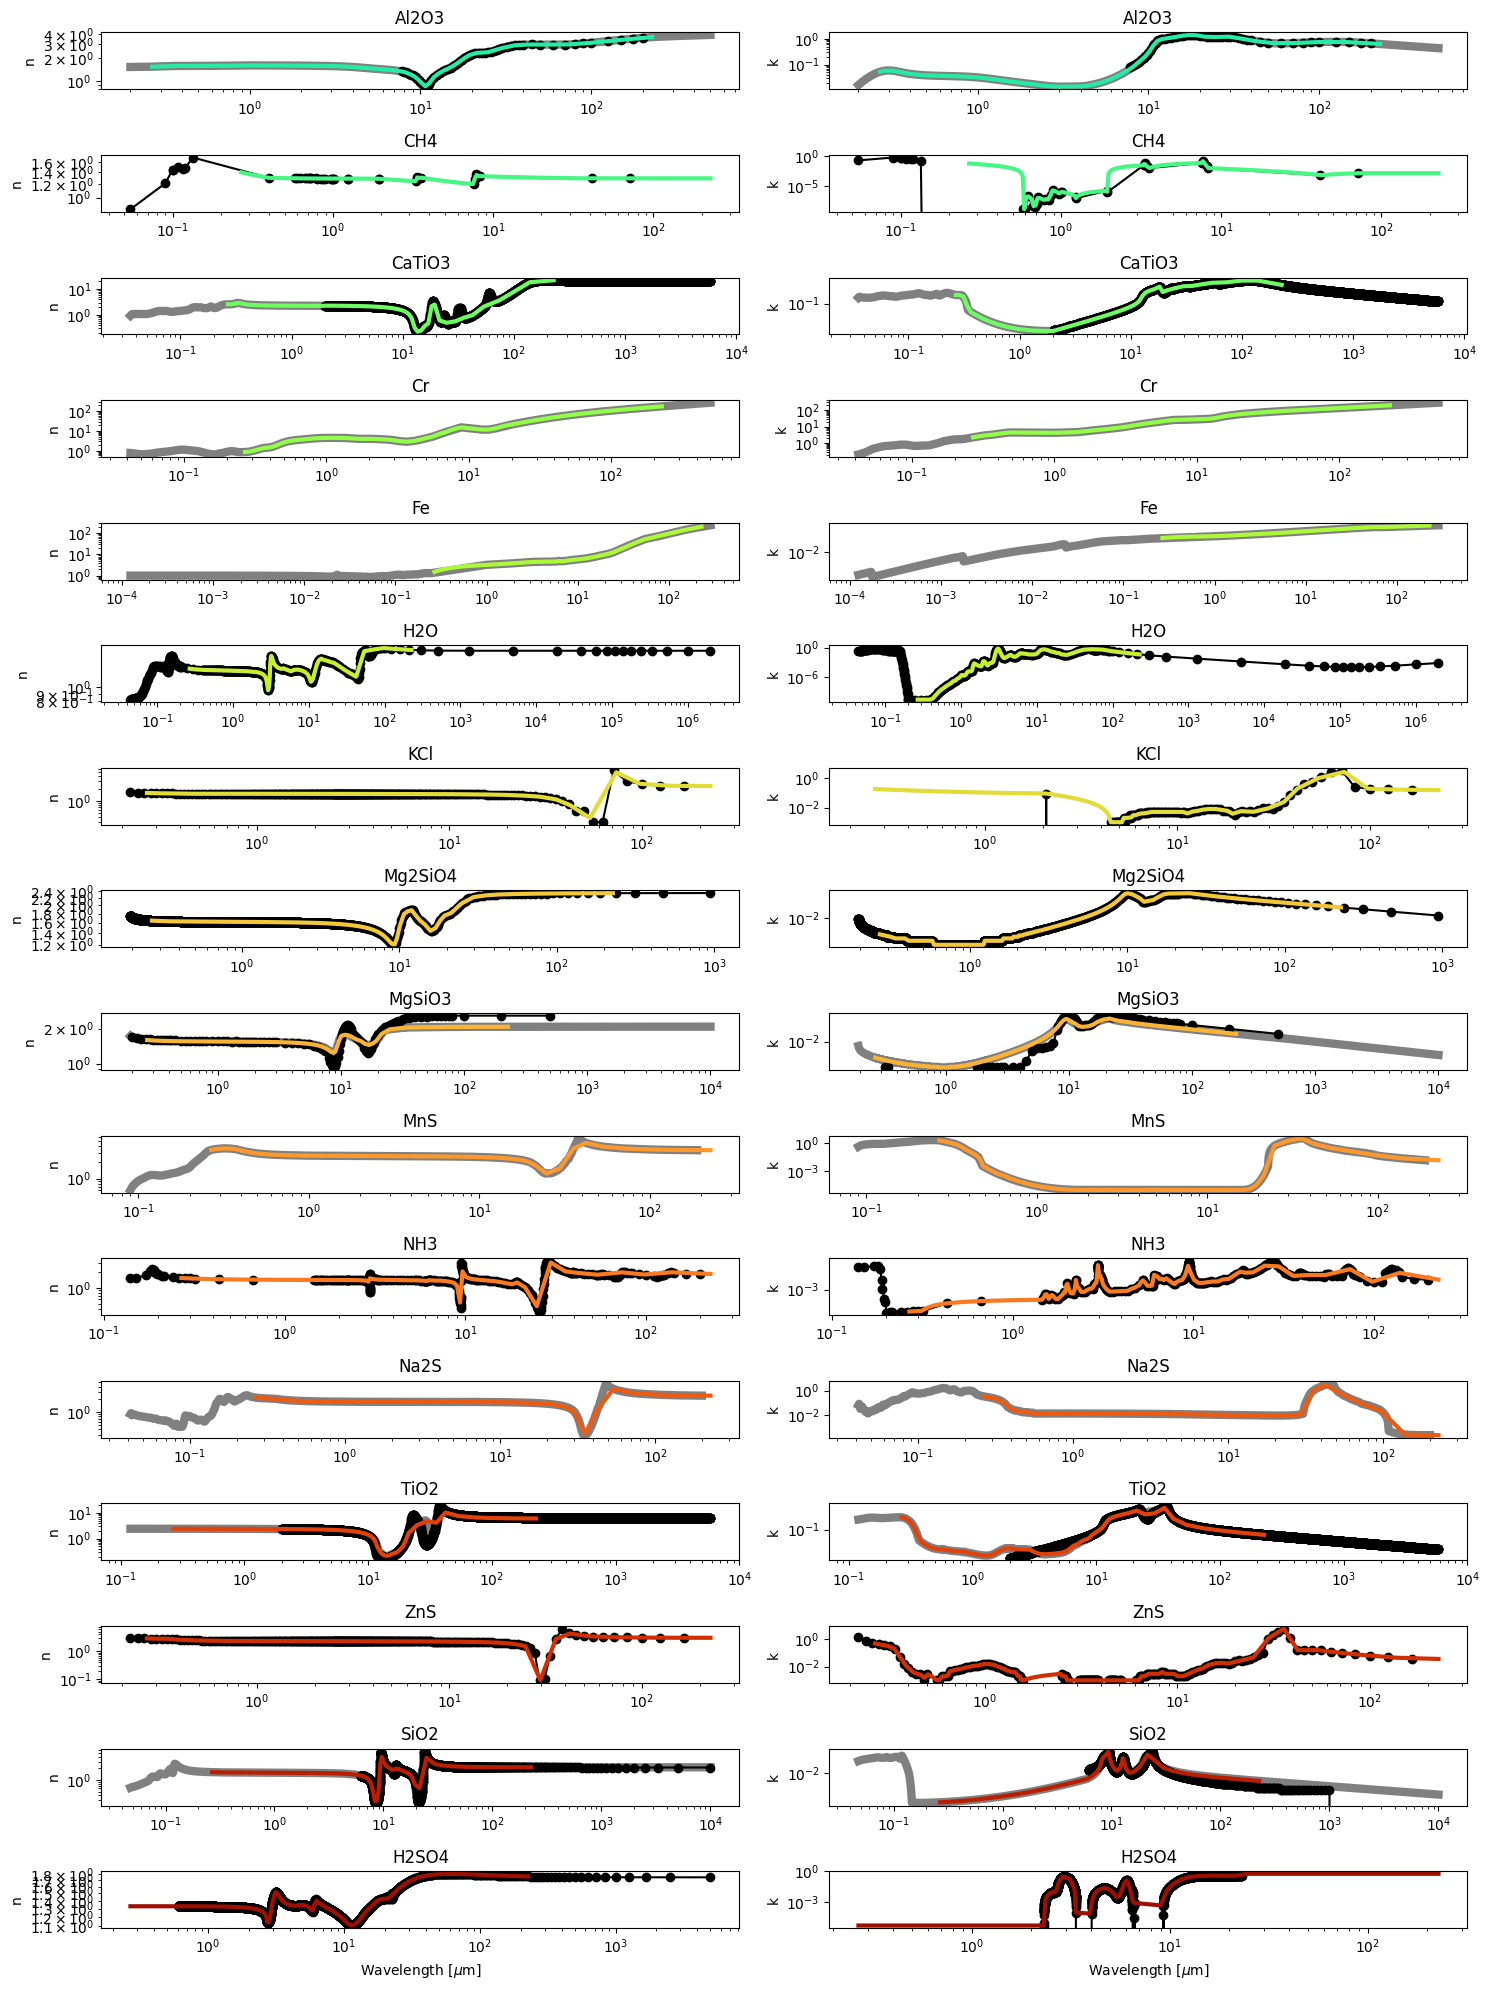

In [6]:
hitran_directory = '/Users/nbatalh1/Documents/data/hitran_ri/'
#virga_dir = '/Users/nbatalh1/Documents/data/virga/' #only if you want to compare to old data
#lxmie_dir = '/Users/nbatalh1/Documents/codes/LX-MIE/compilation/' #optional: only if you want to compare to all lxmie data
output_dir = '/Users/nbatalh1/Documents/data/virga_new'#optional to save all new data

fig,ax_fn,ax_fk = ior.create_ior_db(hitran_directory, 
                        output_dir = output_dir)#, 
                        #lxmie_dir=lxmie_dir)

In [7]:
for i in [0,1,5,7,15]: ax_fn[i].set_yscale('linear')
for i in ax_fn: i.set_ylabel('n',fontsize=14)
for i in ax_fk: i.set_ylabel('k',fontsize=14)
ax_fn[-1].set_xlabel(r'Wavelength [$\mu$m]',fontsize=14)
ax_fk[-1].set_xlabel(r'Wavelength [$\mu$m]',fontsize=14)
fig.savefig('/Users/nbatalh1/Documents/research/virga_paper/IOR.png')

## Now follow through with new Mie parameters

In [8]:
#below 'output_dir' specifies where the new IOR files are, and where you want the new MIE files to go
#in this case I am using the same place
newmie = jdi.calc_mie_db('H2O', output_dir, output_dir, rmin = 1e-8, nradii = 60)

Computing H2O

196 wavelengths of refractive index data found for H2O. Grid of mean radii (in bins) to calculate extinction and scattering efficiencies for (in cm):

	       min             mean             max          bin width (dr) 
	   8.693417e-09    1.000000e-08    1.130658e-08       2.613167e-09
	   1.130658e-08    1.300591e-08    1.470525e-08       3.398662e-09
	   1.470525e-08    1.691538e-08    1.912552e-08       4.420271e-09
	   1.912552e-08    2.200000e-08    2.487448e-08       5.748967e-09
	   2.487448e-08    2.861301e-08    3.235154e-08       7.477057e-09
	   3.235154e-08    3.721384e-08    4.207614e-08       9.724596e-09
	   4.207614e-08    4.840000e-08    5.472386e-08       1.264773e-08
	   5.472386e-08    6.294863e-08    7.117339e-08       1.644953e-08
	   7.117339e-08    8.187044e-08    9.256750e-08       2.139411e-08
	   9.256750e-08    1.064800e-07    1.203925e-07       2.782500e-08
	   1.203925e-07    1.384870e-07    1.565815e-07       3.618896e-08
	   1.565815e-07

Optical properties for H2O have been calculated and saved as /Users/nbatalh1/Documents/data/virga_new/H2O.mieff
